In [1]:
import numpy as np
import sys
from bamboost import Manager
# get information about location of data
sys.path.append('..')
import simulations_v8_SA1D_default.config as cwc

In [2]:
db = Manager(cwc.datafolder)
db.df

id notes    status    D  H_remote  T_remote  Tini  heatFlowSides  \
0    a4b48f56        Finished  200       0.6      20.0  20.0             10   
1    1dfae1ba        Finished  200       0.6      20.0  20.0             10   
2    00aeaa47        Finished  200       0.6      20.0  14.0             10   
3    8108001e        Finished  200       0.6      24.0  20.0             10   
4    44a44b2b        Finished  200       0.6      20.0  20.0             16   
..        ...   ...       ...  ...       ...       ...   ...            ...   
141  dc7e50f9        Finished  200       0.6      20.0  20.0             10   
142  ea811d2a        Finished  200       0.6      20.0  20.0             12   
143  49cc85ef        Finished  200       0.6      20.0  20.0             10   
144  9abe909a        Finished  200       0.6      34.0  20.0             10   
145  ae952a0d        Finished  200       0.6      20.0  20.0             10   

     height  humFlowSides  processors  submitted  timeCJ           time_stamp  \
0       1.0           6.5           1       True    18.0  2024-02-15 15:07:42   
1       0.8           1.0           1       True   548.5  2024-02-15 17:55:10   
2       1.0           1.0           1       True   562.5  2024-02-15 18:21:59   
3       1.0           1.0           1       True   492.0  2024-02-15 19:07:11   
4       1.0           1.0           1       True   484.5  2024-02-15 18:52:31   
..      ...           ...         ...        ...     ...                  ...   
141     1.0           2.5           1       True   117.5  2024-02-15 15:19:08   
142     1.0           1.0           1       True   494.0  2024-02-15 16:35:52   
143     1.0           1.0           1       True   501.0  2024-02-15 18:33:27   
144     1.0           1.0           1       True   459.5  2024-02-15 20:40:47   
145     1.4           1.0           1       True   439.5  2024-02-15 20:11:17   

     width  
0      0.2  
1      0.2  
2      0.2  
3      0.2  
4      0.2  
..     ...  
141    0.2  
142    0.2  
143    0.2  
144    0.2  
145    0.2  

[146 rows x 15 columns]

In [3]:
# runningSims=[]
# for sim in db.sims(db.df.status=='Initiated', return_writer=True):
#     print(f'simulation {sim.uid}', flush=True)
#     print(sim.parameters)
#     runningSims.append(sim.uid)
# print(len(runningSims))

In [4]:
# newdab= db.df[(db.df.width==0.2) & 
#               (db.df.height==1.0) & 
#               (db.df.D==200) & 
# #               (db.df.Tini==20) &
#               (db.df.T_remote==20) &
#               (db.df.H_remote==0.6) &
#               (db.df.heatFlowSides==10) &
#               (db.df.humFlowSides==1.0)
#              ]
# print(newdab)

In [5]:
# for sim in db.sims((db.df.width==0.2) & 
#                    (db.df.height==1.6) & 
#                    (db.df.D==200) & 
#                    (db.df.Tini==20) &
#                    (db.df.T_remote==20) &
#                    (db.df.H_remote==0.60) &
#                    (db.df.heatFlowSides==10) &
#                    (db.df.humFlowSides==1.0)
#                   ):
#     print(sim.uid)
#     print(sim.parameters)

In [6]:
defTimeCJ= db.df[(db.df.width==0.2) & 
                   (db.df.height==1.0) & 
                   (db.df.D==200) & 
                   (db.df.Tini==20) &
                   (db.df.T_remote==20) &
                   (db.df.H_remote==0.6) &
                   (db.df.heatFlowSides==10) &
                   (db.df.humFlowSides==1.0)]['timeCJ']

print(defTimeCJ)

116    501.0
Name: timeCJ, dtype: float64


# Figure setup

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.image import imread

params={'axes.labelsize': 8,
        'axes.titlesize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'axes.titlepad': 1,
        'axes.labelpad': 1,
        'lines.linewidth': 0.8,
        'legend.fontsize': 7
    }
matplotlib.rcParams.update(params)

# Structural geometry

In [8]:
# Extract data
shortdab_width= db.df[((db.df.width>=0.1) & (db.df.width<=0.401)) & 
                   (db.df.height==1.0) & 
                   (db.df.D==200) & 
                   (db.df.Tini==20) &
                   (db.df.T_remote==20) &
                   (db.df.H_remote==0.6) &
                   (db.df.heatFlowSides==10) &
                   (db.df.humFlowSides==1.0)]

width= shortdab_width.width.to_numpy()
CJwidth= (shortdab_width.timeCJ.to_numpy())/float(defTimeCJ)



shortdab_heigth= db.df[(db.df.width==0.2) & 
                   ((db.df.height>=0.6) & (db.df.height<=2.01) ) & 
                   (db.df.D==200) & 
                   (db.df.Tini==20) &
                   (db.df.T_remote==20) &
                   (db.df.H_remote==0.6) &
                   (db.df.heatFlowSides==10) &
                   (db.df.humFlowSides==1.0)]

height= shortdab_heigth.height.to_numpy()
CJheight= (shortdab_heigth.timeCJ.to_numpy())/float(defTimeCJ)

In [9]:

# # Linear regression
# heatFlowSides_filtered = heatFlowSides[(heatFlowSides>=5)]
# CJheatFlowSides_filtered = CJheatFlowSides[(heatFlowSides>=5)]

# coefficients = np.polyfit(heatFlowSides_filtered, CJheatFlowSides_filtered, 1)
# polyline_heatFlowSides = np.poly1d(coefficients); print('heatFlowSides_remote_fit:',polyline_heatFlowSides)

# xline_filtered = np.linspace(min(heatFlowSides_filtered), max(heatFlowSides_filtered), 100)
# yline_filtered = polyline_heatFlowSides(xline_filtered)


# # Plot data points
# heatFlowSides_default=[10, 1.0] # coordinates of point with default configuration

# ax2.scatter(heatFlowSides[heatFlowSides != heatFlowSides_default[0]], CJheatFlowSides[heatFlowSides != heatFlowSides_default[0]], label='simulation', color='#ebcba0', edgecolor='#f08c00', linewidth=1, marker='o', s=30)
# ax2.scatter(heatFlowSides_default[0], heatFlowSides_default[1], color='#f08c00', edgecolor='#f08c00', linewidth=1, marker='o', s=30)

# ax2.plot(xline_filtered, yline_filtered, color='black', label='best fit', linewidth=0.5)


# ax2.axhline(y=1.05, color='grey', linestyle='--')
# ax2.axhline(y=0.95, color='grey', linestyle='--')
# ax2.text(0.1, 1.07, "+5%", fontsize=6, color='grey')
# ax2.text(0.1, 0.88, "-5%", fontsize=6, color='grey')

# ax2.add_patch(patches.FancyArrowPatch((10, 1.05), (10, 1.2), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
# ax2.text(10.7, 1.11, 'slower drying', va='bottom', fontsize=6, color='grey')
# ax2.add_patch(patches.FancyArrowPatch((10, 0.95), (10, 0.8), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
# ax2.text(10.7, 0.81, 'faster drying', va='bottom', fontsize=6, color='grey')

# ax2.text(-10, 1.43, "(a)", fontsize=8, color='black', weight='bold')
# ax2.text(0.5, 1.43, "(b)", fontsize=8, color='black', weight='bold')
# ax3.text(7.5, 1.43, "(c)", fontsize=8, color='black', weight='bold')


# ax2.set_ylabel('Relative time for cold\njoint formation, $\chi$ [-]', labelpad=5)
# ax2.set_xlabel('Coef. of heat exchange, $h_{T}$ [W/(m$^2$ K)]', labelpad=5)
# ax2.set_xlim(0, 21)
# ax2.set_ylim(0., 1.55)



# # Fit for STAGNANT conditions
# humFlowSides_filtered = humFlowSides[(humFlowSides<=2)]
# CJhumFlowSides_filtered = CJhumFlowSides[(humFlowSides<=2)]
# coefficients = np.polyfit(humFlowSides_filtered, CJhumFlowSides_filtered, 1)
# polyline_humFlowSides = np.poly1d(coefficients); print('humFlowSides_remote_fit STAGNANT:',polyline_humFlowSides)
# xline_filtered = np.linspace(min(humFlowSides_filtered), max(humFlowSides_filtered), 100)
# yline_filtered = polyline_humFlowSides(xline_filtered)

# # Fit for ACTIVE CIRCULATION conditions
# humFlowSides_filtered1 = humFlowSides[(humFlowSides>=3)]
# CJhumFlowSides_filtered1 = CJhumFlowSides[(humFlowSides>=3)]
# coefficients1 = np.polyfit(humFlowSides_filtered1, CJhumFlowSides_filtered1, 1)
# polyline_humFlowSides1 = np.poly1d(coefficients1); print('humFlowSides_remote_fit ACTIVE CIRCULATION:',polyline_humFlowSides1)
# xline_filtered1 = np.linspace(min(humFlowSides_filtered1), max(humFlowSides_filtered1), 100)
# yline_filtered1 = polyline_humFlowSides1(xline_filtered1)


# # Plot data points
# humFlowSides_default=[1.0, 1.0] # coordinates of point with default configuration
# ax3.scatter(humFlowSides[humFlowSides != humFlowSides_default[0]], CJhumFlowSides[humFlowSides != humFlowSides_default[0]], label='simulation', color='#92b5d6', edgecolor='#1971c2', linewidth=1, marker='o', s=30)
# ax3.scatter(humFlowSides_default[0], humFlowSides_default[1], color='#1971c2', edgecolor='#1971c2', linewidth=1, marker='o', s=30)

# ax3.plot(xline_filtered, yline_filtered, color='black', label='linear fit', linewidth=0.5)
# ax3.plot(xline_filtered1, yline_filtered1, color='black', linewidth=0.5)

# ax3.axhline(y=1.05, color='grey', linestyle='--')
# ax3.axhline(y=0.95, color='grey', linestyle='--')
# ax3.text(7.3, 1.07, "+5%", fontsize=6, color='grey')
# ax3.text(7.3, 0.88, "-5%", fontsize=6, color='grey')

# ax3.plot([0.7, 1.2], [0.15, 0.15], color='grey')
# ax3.plot([0.7, 0.7], [0.15, 0.55], color='grey')
# ax3.plot([0.7, 1.2], [0.55, 0.15], color='grey')
# ax3.text(0.2, 0.2, "$\chi=10\%$", fontsize=7, color='grey', rotation=90)
# ax3.text(0.1, 0.05, "$\Delta h_H= 0.1$mm/day", fontsize=7, color='grey')


# ax3.axvline(x=2, color='grey', linestyle='--')
# ax3.axvline(x=3, color='grey', linestyle='--')
# ax3.add_patch(patches.FancyArrowPatch((1.9, 1.48), (1.1, 1.48), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
# ax3.text(1.5, 1.12, 'stagnant', va='bottom', fontsize=6, color='grey', rotation=90)
# ax3.add_patch(patches.FancyArrowPatch((3.1, 1.48), (3.9, 1.48), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
# ax3.text(3.3, 1.21, 'forced', va='bottom', fontsize=6, color='grey', rotation=90)

# ax3.set_yticks([])

# ax3.set_xlabel('Coef. of hum. exchange, $h_{H}$ [mm/day]', labelpad=5)
# ax3.set_xlim(0., 8.2)
# ax3.set_ylim(0., 1.55)
# ax2.legend()

# plt.savefig('factors_interaction.png', dpi=300)
# plt.show()

width_fit:  
-1.303 x + 1.271
height_fit:  
-0.3054 x + 1.331


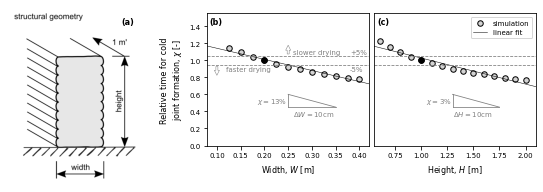

In [10]:
## Canvas design
figname= 'test'
fig_results= plt.figure(figname)
fig_results.set_size_inches(190/25.4, 63/25.4) # in mm

top= 0.96
btm= 0.22
rgt= 0.99
hspace = 0.07

w_f1= 0.28
w_f2= 0.28
w_f3= 0.26

gs1 = gridspec.GridSpec(1,1)
gs1.update(left=0, right=w_f1, bottom=0, top=1)
ax1 = plt.subplot(gs1[0,0])

gs2 = gridspec.GridSpec(1,1)
gs2.update(left=rgt-w_f3-w_f2-hspace, right=rgt-w_f3-0.05, bottom=btm, top=top)
ax2 = plt.subplot(gs2[0,0])

gs3 = gridspec.GridSpec(1,1)
gs3.update(left=rgt-0.3, right=rgt, bottom=btm, top=top)
ax3 = plt.subplot(gs3[0,0])


# Plot data
img = imread('sketches_structure_geometry.png')
ax1.imshow(img)
ax1.axis('off')


# Linear regression for width and CJwidth
coefficients = np.polyfit(width, CJwidth, 1)
polyline_width = np.poly1d(coefficients); print('width_fit:',polyline_width)
xline_width = np.linspace(0, 0.5, 100)
yline_width = polyline_width(xline_width)

# Plot data points
width_default=[0.2, 1.0] # coordinates of point with default configuration
ax2.scatter(width[width != width_default[0]], CJwidth[width != width_default[0]], label='simulation', color='lightgrey', edgecolor='black', linewidth=1, marker='o', s=30)
ax2.scatter(width_default[0], width_default[1], label='default config', color='black', edgecolor='black', linewidth=1, marker='o', s=30)

ax2.plot(xline_width, yline_width, color='black', label='best fit', linewidth=0.5)

ax2.axhline(y=1.05, color='grey', linestyle='--')
ax2.axhline(y=0.95, color='grey', linestyle='--')
ax2.text(0.38, 1.07, "+5%", fontsize=7, color='grey')
ax2.text(0.38, 0.87, "-5%", fontsize=7, color='grey')

ax2.add_patch(patches.FancyArrowPatch((0.25, 1.05), (0.25, 1.2), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
ax2.text(0.26, 1.07, 'slower drying', fontsize=7, color='grey')
ax2.add_patch(patches.FancyArrowPatch((0.10, 0.95), (0.10, 0.8), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
ax2.text(0.12, 0.87, 'faster drying', fontsize=7, color='grey')

ax2.text(-0.1, 1.43, "(a)", fontsize=8, color='black', weight='bold')
ax2.text(0.085, 1.43, "(b)", fontsize=8, color='black', weight='bold')
ax3.text(0.58, 1.43, "(c)", fontsize=8, color='black', weight='bold')


ax2.set_ylabel('Relative time for cold\njoint formation, $\chi$ [-]', labelpad=5)
ax2.set_xlabel('Width, $W$ [m]', labelpad=5)
ax2.set_xlim(0.08, 0.42)
ax2.set_ylim(0.0, 1.55)

ax2.plot([0.25, 0.35], [0.45, 0.45], color='grey')
ax2.plot([0.25, 0.25], [0.45, 0.6], color='grey')
ax2.plot([0.25, 0.35], [0.6, 0.45], color='grey')
ax2.text(0.185, 0.5, "$\chi=13\%$", fontsize=7, color='grey')
ax2.text(0.26, 0.35, "$\Delta W= 10$cm", fontsize=7, color='grey')

ax3.set_yticks([])

# Linear regression
coefficients = np.polyfit(height, CJheight, 1)
polyline_height = np.poly1d(coefficients); print('height_fit:',polyline_height)
xline_height = np.linspace(0.5, 2.5, 100)
yline_height = polyline_height(xline_height)

# Plot data points
heigth_default=[1.00, 1.0] # coordinates of point with default configuration

ax3.scatter(height[height != heigth_default[0]], CJheight[height != heigth_default[0]], label='simulation', color='lightgrey', edgecolor='black', linewidth=1, marker='o', s=30)
ax3.scatter(heigth_default[0], heigth_default[1], color='black', edgecolor='black', linewidth=1, marker='o', s=30)

ax3.plot(xline_height, yline_height, color='black', label='linear fit', linewidth=0.5)

ax3.set_xlabel('Height, $H$ [m]', labelpad=5)
# # ax3.set_ylabel('relative time for cold joint formation [-]')
ax3.set_xlim(0.55, 2.1)
ax3.set_ylim(0.0, 1.55)

ax3.axhline(y=1.05, color='grey', linestyle='--')
ax3.axhline(y=0.95, color='grey', linestyle='--')
ax3.plot([1.3, 1.75], [0.45, 0.45], color='grey')
ax3.plot([1.3, 1.3], [0.45, 0.6], color='grey')
ax3.plot([1.3, 1.75], [0.6, 0.45], color='grey')
ax3.text(1.05, 0.5, "$\chi=3\%$", fontsize=7, color='grey')
ax3.text(1.3, 0.35, "$\Delta H= 10$cm", fontsize=7, color='grey')



ax3.legend()

plt.savefig('factors_geometry.png', dpi=300)
plt.show()

# Material factors

In [11]:
# Extract data
shortdab_D= db.df[ (db.df.width==0.2) & 
                   (db.df.height==1.0) & 
                   ((db.df.D>=20) & (db.df.D<=200)) & 
                   (db.df.Tini==20) &
                   (db.df.T_remote==20) &
                   (db.df.H_remote==0.6) &
                   (db.df.heatFlowSides==10) &
                   (db.df.humFlowSides==1.0)]

D= shortdab_D.D.to_numpy()
CJD= (shortdab_D.timeCJ.to_numpy())/float(defTimeCJ)


shortdab_Tini= db.df[(db.df.width==0.2) & 
                   (db.df.height==1.0) & 
                   (db.df.D==200) & 
                   ((db.df.Tini>=10) & (db.df.Tini<=50)) &
                   (db.df.T_remote==20) &
                   (db.df.H_remote==0.6) &
                   (db.df.heatFlowSides==10) &
                   (db.df.humFlowSides==1.0)]

Tini= shortdab_Tini.Tini.to_numpy()
CJTini= (shortdab_Tini.timeCJ.to_numpy())/float(defTimeCJ)

Tini_fit:  
-0.01873 x + 1.375
D_fit:  
0.004683 x + 0.1325


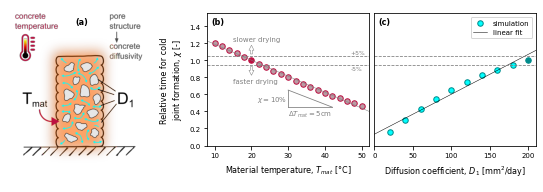

In [12]:
## Canvas design
figname= 'test'
fig_results= plt.figure(figname)
fig_results.set_size_inches(190/25.4, 63/25.4) # in mm

top= 0.96
btm= 0.22
rgt= 0.99
hspace = 0.07

w_f1= 0.28
w_f2= 0.28
w_f3= 0.26

gs1 = gridspec.GridSpec(1,1)
gs1.update(left=0, right=w_f1, bottom=0, top=1)
ax1 = plt.subplot(gs1[0,0])

gs2 = gridspec.GridSpec(1,1)
gs2.update(left=rgt-w_f3-w_f2-hspace, right=rgt-w_f3-0.05, bottom=btm, top=top)
ax2 = plt.subplot(gs2[0,0])

gs3 = gridspec.GridSpec(1,1)
gs3.update(left=rgt-0.3, right=rgt, bottom=btm, top=top)
ax3 = plt.subplot(gs3[0,0])


# Plot data
img = imread('sketches_structure_material.png')
ax1.imshow(img)
ax1.axis('off')

# Linear regression
coefficients = np.polyfit(Tini, CJTini, 1)
polyline_Tini = np.poly1d(coefficients); print('Tini_fit:',polyline_Tini)
xline_Tini = np.linspace(0.0, 60, 100)
yline_Tini = polyline_Tini(xline_Tini)

# Plot data points
Tini_default=[20, 1.0] # coordinates of point with default configuration

ax2.scatter(Tini[Tini != Tini_default[0]], CJTini[Tini != Tini_default[0]], label='simulation', color='#ba9ba4', edgecolor='#bc1142', linewidth=1, marker='o', s=30)
ax2.scatter(Tini_default[0], Tini_default[1], label='default config', color='#bc1142', edgecolor='#bc1142', linewidth=1, marker='o', s=30)

ax2.plot(xline_Tini, yline_Tini, color='grey', label='best fit', linewidth=0.5)


ax2.axhline(y=1.05, color='grey', linestyle='--')
ax2.axhline(y=0.95, color='grey', linestyle='--')
ax2.text(47, 1.07, "+5%", fontsize=6, color='grey')
ax2.text(47, 0.88, "-5%", fontsize=6, color='grey')

ax2.add_patch(patches.FancyArrowPatch((20, 1.05), (20, 1.2), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
ax2.text(15, 1.21, 'slower drying', va='bottom', fontsize=7, color='grey')
ax2.add_patch(patches.FancyArrowPatch((20, 0.95), (20, 0.8), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
ax2.text(15, 0.72, 'faster drying', va='bottom', fontsize=7, color='grey')

ax2.text(-28, 1.43, "(a)", fontsize=8, color='black', weight='bold')
ax2.text(9, 1.43, "(b)", fontsize=8, color='black', weight='bold')
ax3.text(5, 1.43, "(c)", fontsize=8, color='black', weight='bold')

ax2.set_ylabel('Relative time for cold\njoint formation, $\chi$ [-]', labelpad=5)
ax2.set_xlabel('Material temperature, $T_{mat}$ [°C]', labelpad=5)
ax2.set_xlim(8, 52)
ax2.set_ylim(0., 1.55)

ax2.plot([30,42], [0.45, 0.45], color='grey')
ax2.plot([30, 30], [0.45, 0.65], color='grey')
ax2.plot([30, 42], [0.65, 0.45], color='grey')
ax2.text(21.5, 0.52, "$\chi=10\%$", fontsize=7, color='grey')
ax2.text(30, 0.35, "$\Delta T_{mat}= 5$cm", fontsize=7, color='grey')

ax3.set_yticks([])

# Linear regression
coefficients = np.polyfit(D, CJD, 1)
polyline_D = np.poly1d(coefficients); print('D_fit:',polyline_D)
xline_D = np.linspace(0, 210, 100)
yline_D = polyline_D(xline_D)

# Plot data points
D_default=[200, 1.0] # coordinates of point with default configuration
ax3.scatter(D[D != D_default[0]], CJD[D != D_default[0]], label='simulation', color='cyan', edgecolor='darkcyan', linewidth=1, marker='o', s=30)
ax3.scatter(D_default[0], D_default[1], color='darkcyan', edgecolor='darkcyan', linewidth=1, marker='o', s=30)

ax3.plot(xline_D, yline_D, color='black', label='linear fit', linewidth=0.5)

ax3.axhline(y=1.05, color='grey', linestyle='--')
ax3.axhline(y=0.95, color='grey', linestyle='--')

# x_ticks_D = np.arange(0, 251, 50)
# ax3.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_ticks_D))
# ax3.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%i'))

ax3.set_xlabel('Diffusion coefficient, $D_{1}$ [mm$^2$/day]', labelpad=5)
ax3.set_xlim(0., 210)
ax3.set_ylim(0., 1.55)
ax3.legend()

plt.savefig('factors_material.png', dpi=300)
plt.show()

# Ambient factors

In [13]:
# Extract data
shortdab_T_remote= db.df[ (db.df.width==0.2) & 
                   (db.df.height==1.0) & 
                   (db.df.D==200) & 
                   (db.df.Tini==20) &
                   ((db.df.T_remote>=0) & (db.df.T_remote<=60)) &
                   (db.df.H_remote==0.6) &
                   (db.df.heatFlowSides==10) &
                   (db.df.humFlowSides==1.0)]

T_remote= shortdab_T_remote.T_remote.to_numpy()
CJT_remote= (shortdab_T_remote.timeCJ.to_numpy())/float(defTimeCJ)

T_remote_fit:  
-0.006346 x + 1.133


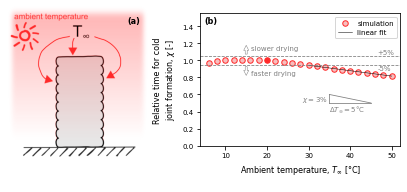

In [14]:
## Canvas design
figname= 'test'
fig_results= plt.figure(figname)
fig_results.set_size_inches(140/25.4, 63/25.4) # in mm

top= 0.96
btm= 0.22
rgt= 0.99
vspace = 0.13

w_f1= 0.357

gs1 = gridspec.GridSpec(1,1)
gs1.update(left=0, right=w_f1, bottom=0, top=1)
ax1 = plt.subplot(gs1[0,0])

gs2 = gridspec.GridSpec(1,1)
gs2.update(left=w_f1+vspace, right=rgt, bottom=btm, top=top)
ax2 = plt.subplot(gs2[0,0])



# Plot data
img = imread('sketches_structure_ambientTemperature.png')
ax1.imshow(img)
ax1.axis('off')


# Linear regression
T_filtered = T_remote[(T_remote>=30)]
CJT_filtered = CJT_remote[(T_remote>=30)]

coefficients = np.polyfit(T_filtered, CJT_filtered, 1)
polyline_T_remote = np.poly1d(coefficients); print('T_remote_fit:',polyline_T_remote)

xline_filtered = np.linspace(min(T_filtered), max(T_filtered), 100)
yline_filtered = polyline_T_remote(xline_filtered)


# Plot data 
T_remote_default=[20, 1.0] # coordinates of point with default configuration

ax2.scatter(T_remote[T_remote != T_remote_default[0]], CJT_remote[T_remote != T_remote_default[0]], label='simulation', color='#f7bebe', edgecolor='#ff2a2a', linewidth=1, marker='o', s=30)
ax2.scatter(T_remote_default[0], T_remote_default[1], color='#ff2a2a', edgecolor='#ff2a2a', linewidth=1, marker='o', s=30)

ax2.plot(xline_filtered, yline_filtered, color='black', label='linear fit', linewidth=0.5)

ax2.axhline(y=1.05, color='grey', linestyle='--')
ax2.axhline(y=0.95, color='grey', linestyle='--')
ax2.text(46.5, 1.07, "+5%", fontsize=7, color='grey')
ax2.text(46.5, 0.88, "-5%", fontsize=7, color='grey')
ax2.add_patch(patches.FancyArrowPatch((15, 1.05), (15, 1.2), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
ax2.text(16.2, 1.11, 'slower drying', va='bottom', fontsize=7, color='grey')
ax2.add_patch(patches.FancyArrowPatch((15, 0.95), (15, 0.8), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
ax2.text(16.2, 0.81, 'faster drying', va='bottom', fontsize=7, color='grey')

ax2.text(-13.5, 1.43, "(a)", fontsize=8, color='black', weight='bold')
ax2.text(5, 1.43, "(b)", fontsize=8, color='black', weight='bold')


ax2.plot([35, 45], [0.5, 0.5], color='grey')
ax2.plot([35, 35], [0.5, 0.6], color='grey')
ax2.plot([35, 45], [0.6, 0.5], color='grey')
ax2.text(35, 0.4, "$\Delta T_{\infty}=5$°C", fontsize=7, color='grey')
ax2.text(28.5, 0.52, "$\chi = 3\%$", fontsize=7, color='grey')


ax2.set_ylabel('Relative time for cold\njoint formation, $\chi$ [-]', labelpad=5)
ax2.set_xlabel('Ambient temperature, $T_{\infty}$ [°C]', labelpad=5)
ax2.set_xlim(4, 52)
ax2.set_ylim(0.0, 1.55)
ax2.legend()



plt.savefig('factors_ambientTemperature.png', dpi=300)
plt.show()

In [15]:
shortdab_H_remote= db.df[(db.df.width==0.2) & 
                   (db.df.height==1.0) & 
                   (db.df.D==200) & 
                   (db.df.Tini==20) &
                   (db.df.T_remote==20) &
                   ((db.df.H_remote>=0.3) & (db.df.H_remote<=0.71)) &
                   (db.df.heatFlowSides==10) &
                   (db.df.humFlowSides==1.0)]

H_remote= shortdab_H_remote.H_remote.to_numpy()
CJH_remote= (shortdab_H_remote.timeCJ.to_numpy())/float(defTimeCJ)

H_remote_fit:  
2.066 x - 0.2344


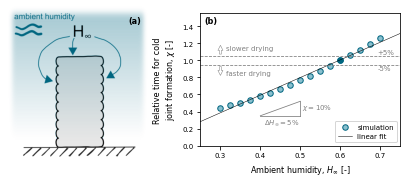

In [16]:
## Canvas design
figname= 'test'
fig_results= plt.figure(figname)
fig_results.set_size_inches(140/25.4, 63/25.4) # in mm

top= 0.96
btm= 0.22
rgt= 0.99
vspace = 0.13

w_f1= 0.357

gs1 = gridspec.GridSpec(1,1)
gs1.update(left=0, right=w_f1, bottom=0, top=1)
ax1 = plt.subplot(gs1[0,0])

gs2 = gridspec.GridSpec(1,1)
gs2.update(left=w_f1+vspace, right=rgt, bottom=btm, top=top)
ax2 = plt.subplot(gs2[0,0])



# Plot data
img = imread('sketches_structure_ambientHumidity.png')
ax1.imshow(img)
ax1.axis('off')

# Linear regression
coefficients = np.polyfit(H_remote, CJH_remote, 1)
polyline_H_remote = np.poly1d(coefficients); print('H_remote_fit:',polyline_H_remote)
xline_H_remote = np.linspace(0, 1, 100)
yline_H_remote = polyline_H_remote(xline_H_remote)

# Plot data points
H_remote_default=[0.6, 1.0] # coordinates of point with default configuration
ax2.scatter(H_remote[H_remote != H_remote_default[0]], CJH_remote[H_remote != H_remote_default[0]], label='simulation', color='#8ac0cf', edgecolor='#006680', linewidth=1, marker='o', s=30)
ax2.scatter(H_remote_default[0], H_remote_default[1], color='#006680', edgecolor='#006680', linewidth=1, marker='o', s=30)

ax2.plot(xline_H_remote, yline_H_remote, color='black', label='linear fit', linewidth=0.5)

ax2.axhline(y=1.05, color='grey', linestyle='--')
ax2.axhline(y=0.95, color='grey', linestyle='--')
ax2.text(0.694, 1.07, "+5%", fontsize=7, color='grey')
ax2.text(0.694, 0.88, "-5%", fontsize=7, color='grey')
ax2.add_patch(patches.FancyArrowPatch((0.3, 1.05), (0.3, 1.2), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
ax2.text(0.315, 1.11, 'slower drying', va='bottom', fontsize=7, color='grey')
ax2.add_patch(patches.FancyArrowPatch((0.3, 0.95), (0.3, 0.8), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
ax2.text(0.315, 0.81, 'faster drying', va='bottom', fontsize=7, color='grey')


ax2.text(0.07, 1.43, "(a)", fontsize=8, color='black', weight='bold')
ax2.text(0.26, 1.43, "(b)", fontsize=8, color='black', weight='bold')

ax2.plot([0.4, 0.5], [0.35, 0.35], color='grey')
ax2.plot([0.4, 0.5], [0.35, 0.52], color='grey')
ax2.plot([0.5, 0.5], [0.35, 0.52], color='grey')
ax2.text(0.505, 0.43, "$\chi=10\%$", fontsize=7, color='grey')
ax2.text(0.41, 0.25, "$\Delta H_{\infty}= 5\%$", fontsize=7, color='grey')


ax2.set_ylabel('Relative time for cold\njoint formation, $\chi$ [-]', labelpad=5)
ax2.set_xlabel('Ambient humidity, $H_{\infty}$ [-]', labelpad=5)
ax2.set_xlim(0.25, 0.75)
ax2.set_ylim(0.0, 1.55)
ax2.legend(loc='lower right')


plt.savefig('factors_ambientHumidity.png', dpi=300)
plt.show()

# Interaction

In [17]:
# Extract data
shortdab_heatFlowSides= db.df[ (db.df.width==0.2) & 
                   (db.df.height==1.0) & 
                   (db.df.D==200) & 
                   (db.df.Tini==20) &
                   (db.df.T_remote==20) &
                   (db.df.H_remote==0.6) &
                   ((db.df.heatFlowSides>=0) & (db.df.heatFlowSides<=30)) &
                   (db.df.humFlowSides==1.0)]

heatFlowSides= shortdab_heatFlowSides.heatFlowSides.to_numpy()
CJheatFlowSides= (shortdab_heatFlowSides.timeCJ.to_numpy())/float(defTimeCJ)


shortdab_humFlowSides= db.df[(db.df.width==0.2) & 
                   (db.df.height==1.0) & 
                   (db.df.D==200) & 
                   (db.df.Tini==20) &
                   (db.df.T_remote==20) &
                   (db.df.H_remote==0.6) &
                   (db.df.heatFlowSides==10) &
                   ((db.df.humFlowSides>=0.0) & (db.df.humFlowSides<=10)) ]

humFlowSides= shortdab_humFlowSides.humFlowSides.to_numpy()
CJhumFlowSides= (shortdab_humFlowSides.timeCJ.to_numpy())/float(defTimeCJ)

print(humFlowSides, CJhumFlowSides)

[6.5  4.5  3.75 4.   5.75 4.25 4.75 5.   2.25 0.75 6.25 7.   6.75 3.25
 0.25 3.5  1.75 7.75 0.5  5.5  2.75 3.   1.5  5.25 6.   7.5  2.   1.
 8.   1.25 7.25 2.5 ] [0.03592814 0.0738523  0.10578842 0.09281437 0.04590818 0.08283433
 0.06686627 0.05988024 0.28642715 1.24650699 0.03892216 0.03093812
 0.03293413 0.14071856 1.80938124 0.12175649 0.45608782 0.0249501
 1.50898204 0.0499002  0.19461078 0.16467066 0.59281437 0.05489022
 0.04191617 0.02694611 0.35828343 1.         0.0239521  0.77644711
 0.02894212 0.23453094]


heatFlowSides_remote_fit:  
-0.006872 x + 1.079
humFlowSides_remote_fit STAGNANT:  
-0.8384 x + 1.912
humFlowSides_remote_fit ACTIVE CIRCULATION:  
-0.02414 x + 0.1968


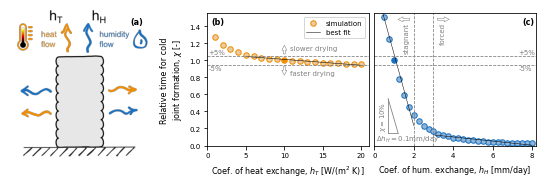

In [18]:
## Canvas design
figname= 'test'
fig_results= plt.figure(figname)
fig_results.set_size_inches(190/25.4, 63/25.4) # in mm

top= 0.96
btm= 0.22
rgt= 0.99
hspace = 0.07

w_f1= 0.28
w_f2= 0.28
w_f3= 0.26

gs1 = gridspec.GridSpec(1,1)
gs1.update(left=0, right=w_f1, bottom=0, top=1)
ax1 = plt.subplot(gs1[0,0])

gs2 = gridspec.GridSpec(1,1)
gs2.update(left=rgt-w_f3-w_f2-hspace, right=rgt-w_f3-0.05, bottom=btm, top=top)
ax2 = plt.subplot(gs2[0,0])

gs3 = gridspec.GridSpec(1,1)
gs3.update(left=rgt-0.3, right=rgt, bottom=btm, top=top)
ax3 = plt.subplot(gs3[0,0])


# Plot data
img = imread('sketches_structure_interaction.png')
ax1.imshow(img)
ax1.axis('off')


# Linear regression
heatFlowSides_filtered = heatFlowSides[(heatFlowSides>=5)]
CJheatFlowSides_filtered = CJheatFlowSides[(heatFlowSides>=5)]

coefficients = np.polyfit(heatFlowSides_filtered, CJheatFlowSides_filtered, 1)
polyline_heatFlowSides = np.poly1d(coefficients); print('heatFlowSides_remote_fit:',polyline_heatFlowSides)

xline_filtered = np.linspace(min(heatFlowSides_filtered), max(heatFlowSides_filtered), 100)
yline_filtered = polyline_heatFlowSides(xline_filtered)


# Plot data points
heatFlowSides_default=[10, 1.0] # coordinates of point with default configuration

ax2.scatter(heatFlowSides[heatFlowSides != heatFlowSides_default[0]], CJheatFlowSides[heatFlowSides != heatFlowSides_default[0]], label='simulation', color='#ebcba0', edgecolor='#f08c00', linewidth=1, marker='o', s=30)
ax2.scatter(heatFlowSides_default[0], heatFlowSides_default[1], color='#f08c00', edgecolor='#f08c00', linewidth=1, marker='o', s=30)

ax2.plot(xline_filtered, yline_filtered, color='black', label='best fit', linewidth=0.5)


ax2.axhline(y=1.05, color='grey', linestyle='--')
ax2.axhline(y=0.95, color='grey', linestyle='--')
ax2.text(0.1, 1.07, "+5%", fontsize=7, color='grey')
ax2.text(0.1, 0.88, "-5%", fontsize=7, color='grey')

ax2.add_patch(patches.FancyArrowPatch((10, 1.05), (10, 1.2), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
ax2.text(10.7, 1.11, 'slower drying', va='bottom', fontsize=7, color='grey')
ax2.add_patch(patches.FancyArrowPatch((10, 0.95), (10, 0.8), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
ax2.text(10.7, 0.81, 'faster drying', va='bottom', fontsize=7, color='grey')

ax2.text(-10, 1.43, "(a)", fontsize=8, color='black', weight='bold')
ax2.text(0.5, 1.43, "(b)", fontsize=8, color='black', weight='bold')
ax3.text(7.5, 1.43, "(c)", fontsize=8, color='black', weight='bold')


ax2.set_ylabel('Relative time for cold\njoint formation, $\chi$ [-]', labelpad=5)
ax2.set_xlabel('Coef. of heat exchange, $h_{T}$ [W/(m$^2$ K)]', labelpad=5)
ax2.set_xlim(0, 21)
ax2.set_ylim(0., 1.55)



# Fit for STAGNANT conditions
humFlowSides_filtered = humFlowSides[(humFlowSides<=2)]
CJhumFlowSides_filtered = CJhumFlowSides[(humFlowSides<=2)]
coefficients = np.polyfit(humFlowSides_filtered, CJhumFlowSides_filtered, 1)
polyline_humFlowSides = np.poly1d(coefficients); print('humFlowSides_remote_fit STAGNANT:',polyline_humFlowSides)
xline_filtered = np.linspace(min(humFlowSides_filtered), max(humFlowSides_filtered), 100)
yline_filtered = polyline_humFlowSides(xline_filtered)

# Fit for ACTIVE CIRCULATION conditions
humFlowSides_filtered1 = humFlowSides[(humFlowSides>=3)]
CJhumFlowSides_filtered1 = CJhumFlowSides[(humFlowSides>=3)]
coefficients1 = np.polyfit(humFlowSides_filtered1, CJhumFlowSides_filtered1, 1)
polyline_humFlowSides1 = np.poly1d(coefficients1); print('humFlowSides_remote_fit ACTIVE CIRCULATION:',polyline_humFlowSides1)
xline_filtered1 = np.linspace(min(humFlowSides_filtered1), max(humFlowSides_filtered1), 100)
yline_filtered1 = polyline_humFlowSides1(xline_filtered1)


# Plot data points
humFlowSides_default=[1.0, 1.0] # coordinates of point with default configuration
ax3.scatter(humFlowSides[humFlowSides != humFlowSides_default[0]], CJhumFlowSides[humFlowSides != humFlowSides_default[0]], label='simulation', color='#92b5d6', edgecolor='#1971c2', linewidth=1, marker='o', s=30)
ax3.scatter(humFlowSides_default[0], humFlowSides_default[1], color='#1971c2', edgecolor='#1971c2', linewidth=1, marker='o', s=30)

ax3.plot(xline_filtered, yline_filtered, color='black', label='linear fit', linewidth=0.5)
ax3.plot(xline_filtered1, yline_filtered1, color='black', linewidth=0.5)

ax3.axhline(y=1.05, color='grey', linestyle='--')
ax3.axhline(y=0.95, color='grey', linestyle='--')
ax3.text(7.3, 1.07, "+5%", fontsize=7, color='grey')
ax3.text(7.3, 0.88, "-5%", fontsize=7, color='grey')

ax3.plot([0.7, 1.2], [0.15, 0.15], color='grey')
ax3.plot([0.7, 0.7], [0.15, 0.55], color='grey')
ax3.plot([0.7, 1.2], [0.55, 0.15], color='grey')
ax3.text(0.2, 0.2, "$\chi=10\%$", fontsize=7, color='grey', rotation=90)
ax3.text(0.1, 0.05, "$\Delta h_H= 0.1$mm/day", fontsize=7, color='grey')


ax3.axvline(x=2, color='grey', linestyle='--')
ax3.axvline(x=3, color='grey', linestyle='--')
ax3.add_patch(patches.FancyArrowPatch((1.9, 1.48), (1.1, 1.48), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
ax3.text(1.5, 1.09, 'stagnant', va='bottom', fontsize=7, color='grey', rotation=90)
ax3.add_patch(patches.FancyArrowPatch((3.1, 1.48), (3.9, 1.48), mutation_scale=10, edgecolor='grey', facecolor='white', linestyle='solid', linewidth=0.5))
ax3.text(3.3, 1.19, 'forced', va='bottom', fontsize=7, color='grey', rotation=90)

ax3.set_yticks([])

ax3.set_xlabel('Coef. of hum. exchange, $h_{H}$ [mm/day]', labelpad=5)
ax3.set_xlim(0., 8.2)
ax3.set_ylim(0., 1.55)
ax2.legend()

plt.savefig('factors_interaction.png', dpi=300)
plt.show()

In [19]:
# defSimTimeCJ= next(sim.globals['timeCJ'][0] for sim in db.sims((abs(db.df.Tini-20)<=1e-12) & (abs(db.df.T_remote-20)<=1e-12)))
# print(defSimTimeCJ)

In [20]:
# db.df['t_cj'] = np.array([sim.globals['timeCJ'][0] for sim in db])
# X = db.df['Tini'].to_numpy()
# Y = db.df['T_remote'].to_numpy()

In [21]:
# db.df

In [22]:
# fig, ax = plt.subplots()

# tini = np.arange(10, 50, 5)

# for t in tini:
#     tble = db.df[ db.df["Tini"] == t ].sort_values("T_remote")
#     x = tble.T_remote
#     y = tble.t_cj
    
#     ax.scatter(x, y, label=str(t))
    
# ax.legend(title="Tini")


# ax.set_xlabel("T_remote")
# ax.set_ylabel("time_CJ")

# plt.tight_layout()
# plt.show()

In [23]:
# fig, ax = plt.subplots()

# tremote = np.arange(5, 50, 10)

# for t in tremote:
#     tble = db.df[ db.df["T_remote"] == t ].sort_values("Tini")
#     x = tble.Tini
#     y = tble.t_cj
    
#     ax.scatter(x, y, label=str(t))
    
# ax.legend(title="t_remote")

# plt.tight_layout()
# plt.show()

In [24]:
# # Create a heatmap plot
# plt.figure(figsize=(10, 8))
# plt.scatter(X, Y, c=Z/defSimTimeCJ, marker='o', cmap='plasma')
# plt.colorbar()
# plt.xlabel('Tini [deg C]')
# plt.ylabel('T_remote [deg C]')
# plt.title('Relative time to 370 min')
# plt.show()

In [25]:
# layers = {}
# for iT_remote in [6, 8, 10, 12, 14, 16, 18, 20]:
#     Tini = []
#     timeCJ = []
#     for sim in db.sims(db.df.T_remote == iT_remote):
#         Tini.append(sim.parameters['Tini'])
#         timeCJ.append(sim.globals['timeCJ'][0])
#     combined = sorted(zip(Tini, timeCJ))
#     Tini_sorted, timeCJ_sorted = zip(*combined)
#     layer_i = np.column_stack([Tini_sorted, timeCJ_sorted])

#     if iT_remote not in layers:
#         layers[iT_remote] = []

#     layers[iT_remote].append(layer_i)   

# # plt.plot(Tini_sorted, timeCJ_sorted, marker='o', linestyle='-', color='blue', label='Sorted Line')

# plt.figure(figsize=(10, 8))

# for iT_remote, data in layers.items():
#     combined_data = np.vstack(data)
#     Tini_sorted = combined_data[:, 0]
#     timeCJ_sorted = combined_data[:, 1]
#     plt.plot(Tini_sorted, timeCJ_sorted, label=f'T_remote={iT_remote}')

# # Set labels and title
# plt.xlabel('Tini [deg C]')
# plt.ylabel('timeCJ [min]')
# plt.ylim(100, 400)
# plt.title('Plot of Tini vs. timeCJ for different T_remote')
# plt.legend()
# # plt.grid(True)
# plt.show()

In [26]:

# layers = {}
# for iTini in [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]:
#     T_remote = []
#     timeCJ = []
#     for sim in db.sims(db.df.Tini == iTini):
#         T_remote.append(sim.parameters['T_remote'])
#         timeCJ.append(sim.globals['timeCJ'][0])
#     combined = sorted(zip(T_remote, timeCJ))
#     T_remote_sorted, timeCJ_sorted = zip(*combined)
#     layer_i = np.column_stack([T_remote_sorted, timeCJ_sorted])

#     if iTini not in layers:
#         layers[iTini] = []

#     layers[iTini].append(layer_i) 

In [27]:

# fig, ax = plt.subplots()

# init_temp =[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# ax.scatter(T_remote_sorted[0], timeCJ_sorted[0])

# # ax.set_xlim(22, 32)

# plt.show()

In [28]:
# from scipy.optimize import curve_fit

# # plt.plot(Tini_sorted, timeCJ_sorted, marker='o', linestyle='-', color='blue', label='Sorted Line')

# # plt.figure(figsize=(10, 8))
# fig, axes = plt.subplots(1, 2, figsize=(12,4))
# ax, ax2 = axes[0], axes[1]

# llist = []
# yylist = []
# aaa = 1
# slp20 = 3.54
# for iTini, data in layers.items():
#     combined_data = np.vstack(data)
#     T_remote_sorted = combined_data[:, 0]
#     timeCJ_sorted = combined_data[:, 1]
# #     plt.plot(T_remote_sorted, timeCJ_sorted, label=f'Tini={iTini}')
# #     ax.plot(T_remote_sorted-iTini, timeCJ_sorted, label=f'Tini={iTini}')
    

#     max_id= np.argmax(timeCJ_sorted)
#     print(T_remote_sorted[max_id])
    
#     T_before_peak = T_remote_sorted[:max_id]
#     t_before = timeCJ_sorted[:max_id]
    
#     def linfit(x, a, b):
#         return a*x+b
    
#     p, pc = curve_fit(linfit, T_before_peak, t_before)
    
#     ax.plot(T_remote_sorted-iTini, timeCJ_sorted/max(timeCJ_sorted), label=f'Tini={iTini}')

#     yylist.append(p[0])
#     llist.append(iTini)
    
# # ax.vlines(0, 0, 400)
# ax2.scatter(llist, yylist)

# def quadfit(x, a, b, c):
#     return a*x**2 + b*x + c

# lll = np.linspace(llist[0], llist[-1], 100)
# p, oc = curve_fit(quadfit, np.array(llist), np.array(yylist))
# ax2.plot(lll, quadfit(lll, *p))

# ax2.set_xlabel('T initial')
# ax2.set_ylabel("slope before peak")

# # Set labels and title
# ax.set_xlabel('T_remote - Tini [deg C]')
# ax.set_ylabel('timeCJ/time_peak [-]')
# # ax.set_ylim(100, 400)
# ax.set_title('Plot of T_remote vs. timeCJ for different Tini')
# ax.legend()
# # plt.grid(True)

# plt.tight_layout()
# plt.show()


In [29]:
# Tini=[]; timeCJ=[]

# for sim in db.sims(db.df.T_remote==20):
#     print(sim.parameters['Tini'], sim.globals['timeCJ'][0])
#     Tini.append(sim.parameters['Tini']), timeCJ.append(sim.globals['timeCJ'][0])
# print(Tini, timeCJ)

# sorted_indices = np.argsort(Tini)
# Tini_sorted = np.array(Tini)[sorted_indices]
# timeCJ_sorted = np.array(timeCJ)[sorted_indices]

# # Creating a single NumPy array with two columns (x and y)
# sorted_array = np.column_stack((Tini_sorted, timeCJ_sorted))
# print(sorted_array)

In [30]:
# print(sorted_array[:,0])

In [31]:
# Z = np.array([sim.globals['timeCJ'][0] for sim in db])
# # X = db.df['Tini'].to_numpy()
# # Y = db.df['T_remote'].to_numpy()
# print(max(Z), min(Z))
# print(Z)

In [32]:
# sim = db.sims((db.df.width==0.2) & (db.df.height==1.0))[0]

# # sim.globals

In [33]:
# sim.globals

In [34]:
# sim = db.sims((db.df.H_remote==0.5) & 
#               (db.df.T_remote==20) & 
#               (db.df.Tini==20) & 
#               (db.df.heatFlowSides==10) & 
#               (db.df.height==1.0) &
#               (db.df.width==0.2))[0]
# sim.globals

In [35]:
# print(sim)
# sim.parameters

In [36]:
# sim.globals

In [37]:
# runningSims=[]
# for sim in db.sims(db.df.status=='Initiated', return_writer=True):
# #     print(f'simulation {sim.uid}', flush=True)
#     runningSims.append(sim.uid)
# print(len(runningSims))

In [38]:
# # runningSims=[]
# for sim in db.sims(db.df.status=='Initiated', return_writer=True):
# #     print(f'simulation {sim.uid}', flush=True)
#     print(sim.parameters['width'], sim.parameters['height'], sim.uid)
# #     runningSims.append(sim.uid)
# # print(len(runningSims))

In [39]:
# sim= db.sims()
# Z = np.array([sim.globals['timeCJ'][0] for sim in db])
# print(max(Z), min(Z))
# print(len(Z))

In [40]:
# sim = db.sims((db.df.width==0.2) & (db.df.height==1.0))[0]

# # sim.globals

In [41]:
# print(sim.uid)
# sim.globals

In [42]:
# for sim in db.sims():
#     print(sim.globals)

In [43]:
# for sim in db.sims(db.df.Tini==30):
#     print(sim.parameters)

In [44]:
# sim1=db[0]
# print(sim1.parameters)

In [45]:
# sim= db[0]
# print(sim.globals)
# sim.parameters

In [46]:
# Z = np.array([sim.globals['timeCJ'][0] for sim in db])
# # X = db.df['Tini'].to_numpy()
# # Y = db.df['T_remote'].to_numpy()
# print(max(Z), min(Z))
# print(Z)

In [47]:
# sim1 = db.sims((db.df.Tini==20) & (db.df.T_remote==20))[0]
# Z1 = np.array([sim1.globals['timeCJ'][0] for sim1 in db])

In [48]:
## print(len(Z1))